c' c' g' g' a' a' g' f' f' e' e' d' d' c


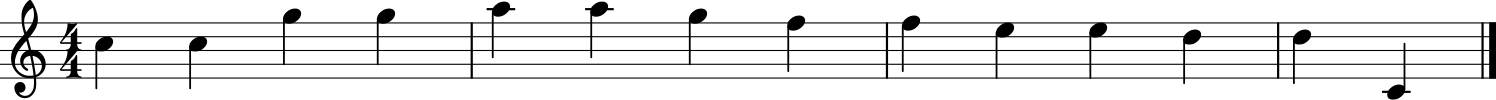

In [15]:
from music21 import *
notes = "C4 C4 G4 G4 A4 A4 G2 F4 F4 E4 E4 D4 D4 C2"

notes = "C C G G A A G F F E E D D C "
notes = "' ".join(notes.lower().split())
print(notes)
timeSig= ''#"2/4"
tinyNotation = " ".join(["tinyNotation:",timeSig, notes])

fakePiece = converter.parse(tinyNotation)
fakePiece.show()

In [4]:
from music21 import *
import pandas as pd
import regex as re

In [43]:
df = pd.read_csv('../scores/csv/Mozart-Ah_vous.csv')

In [44]:
df = df[df['part']=='P1']

In [45]:
note_vals = {'whole':'1','half':'2','quarter':'4','eighth':'8','16th':'16'}
df['note_val'] = df['type'].map(note_vals)
df.loc[df['dotted'] == True,['note_val']] = '.'+df['note_val']

In [46]:
df['pitch'] = df['pitch'].fillna('r')
df['pitch_val'] = df['pitch'].apply(lambda x: x.lower()) + df['note_val']
pitches = df['pitch_val'].to_string(index=False,header=False,na_rep='r')
pitches = re.sub(r'\n|\t','',pitches)
pitches = re.sub(r' +',' ',pitches)
# print(pitches)

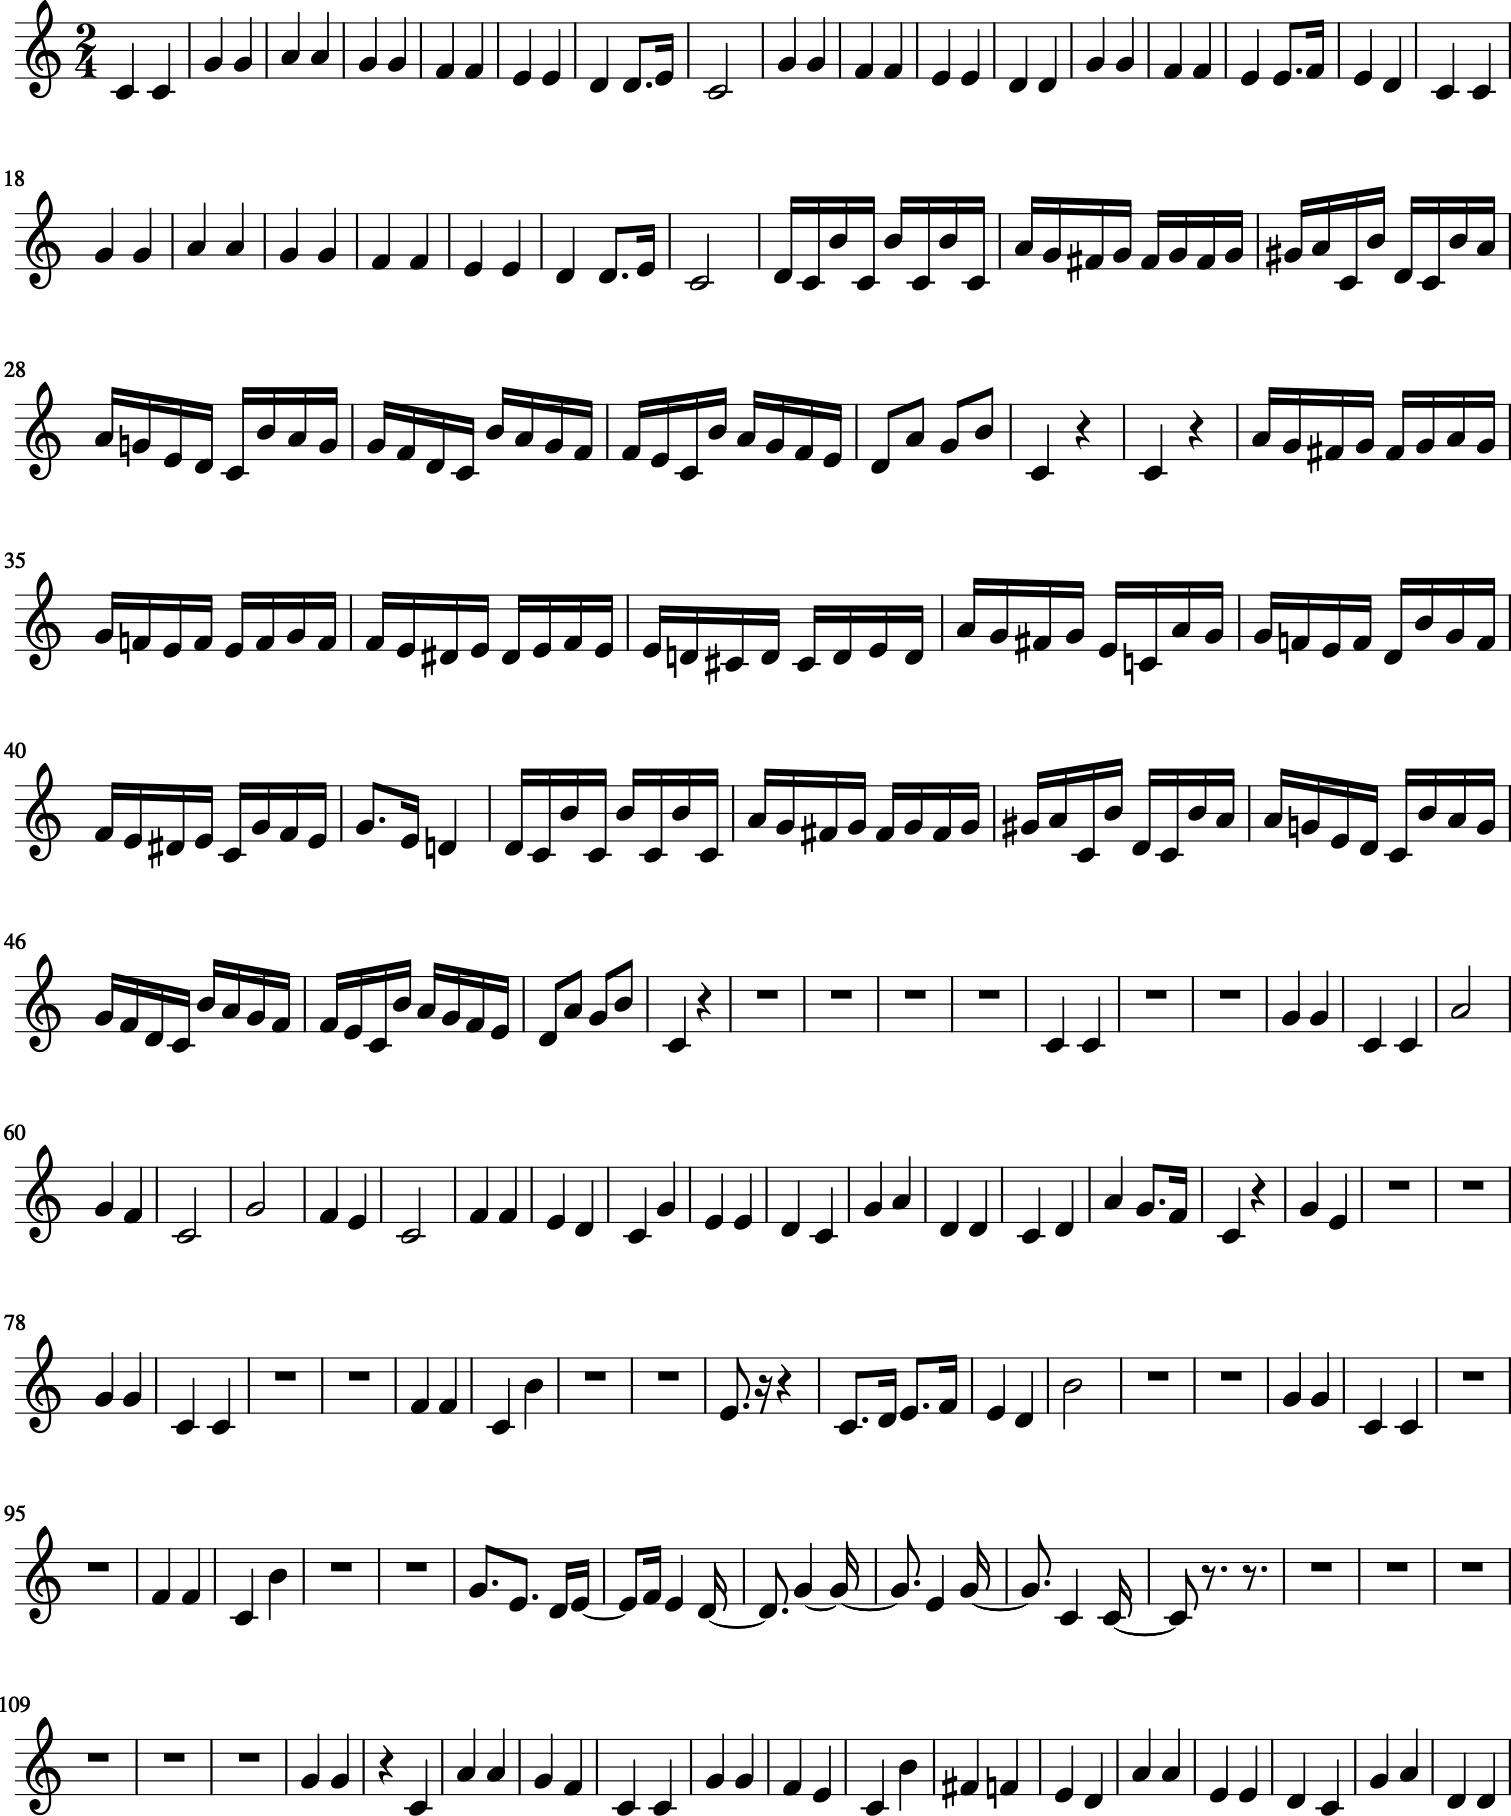

In [47]:
timeSig= "2/4"
tinyNotation = " ".join(["tinyNotation:",timeSig, pitches])
twinkle_twinkle = converter.parse(tinyNotation)
twinkle_twinkle.show()